In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Practicals/economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
## 2 INDependent and 1 dependent feature so multiple lr

In [4]:
# drop unnecssary columns
df.drop(columns = ['Unnamed: 0','year','month'],inplace =True,axis =1)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
## chekcking null values in the dataset in numerical columns
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

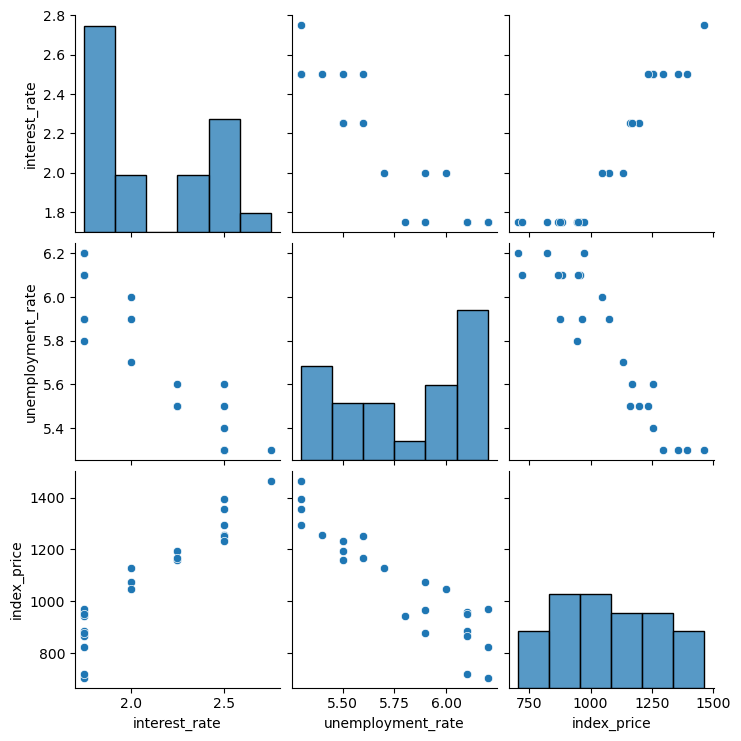

In [8]:
import seaborn as sns
sns.pairplot(df) 

In [10]:
df.corr()
# unemployment rate increase intrest rate decreases , and if index price increase interset rate incerase

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

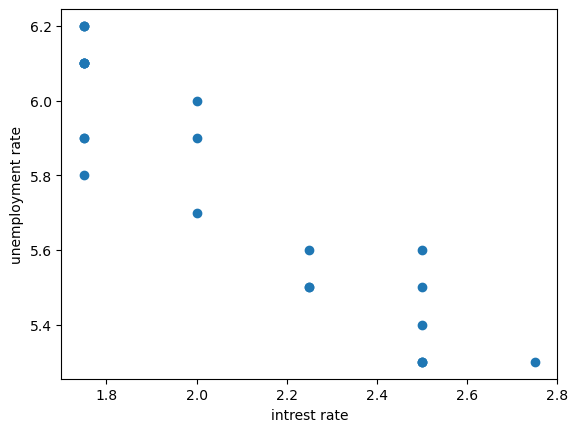

In [11]:
## visualize data points
plt.scatter(df['interest_rate'] ,df['unemployment_rate'])
plt.xlabel('intrest rate')
plt.ylabel('unemployment rate')

In [14]:
# diviied dataset  into dependent and independet variable 
X = df.iloc[:,:-1] # take all the rows and remove just the last column
y = df.iloc[:,-1]

In [16]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [17]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [19]:
## trying to plot if a linear line can be drwan in between the features
import seaborn as sns

In [20]:
df.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

<Axes: xlabel='interest_rate', ylabel='index_price'>

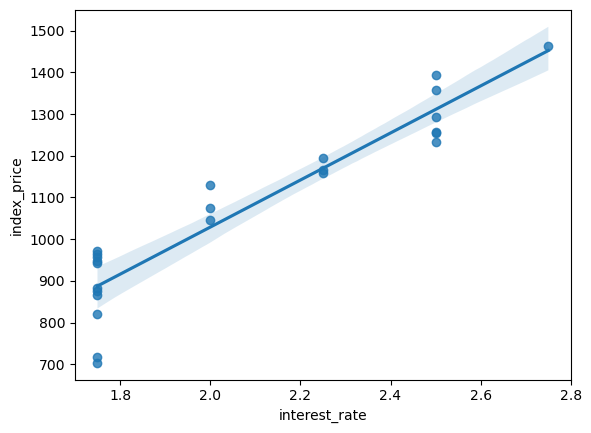

In [23]:
sns.regplot(x= df['interest_rate'],y=df['index_price'])
### errors seem to be in range if we plot a linear line corresposning to selected features

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

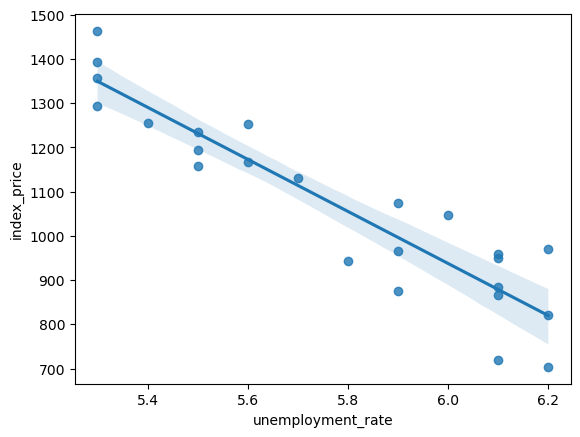

In [24]:
sns.regplot(x= df['unemployment_rate'],y=df['index_price'])

In [25]:
## only 2 features allowed here

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_test  ## df converts to 2d array

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regression = LinearRegression()

In [32]:
regression.fit(X_train, y_train)

LinearRegression()

In [33]:
## cross validation

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
#scoring is the method used to calculate score of each validation set ,avg would be done to het the overallscore
validation_score = cross_val_score(regression,X_train, y_train,scoring = 'neg_mean_absolute_error', cv =3)

In [37]:
validation_score

array([-62.17890383, -85.09549795, -51.24389355])

In [38]:
np.mean(validation_score)

-66.17276510903106

In [39]:
y_pred = regression.predict(X_test)

In [40]:
## Performace metric
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712583
59.93578152323558
76.11677139574815


In [42]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
print(score)

0.8626502528670699


In [43]:
## help us to determine if our model will perform well on given data

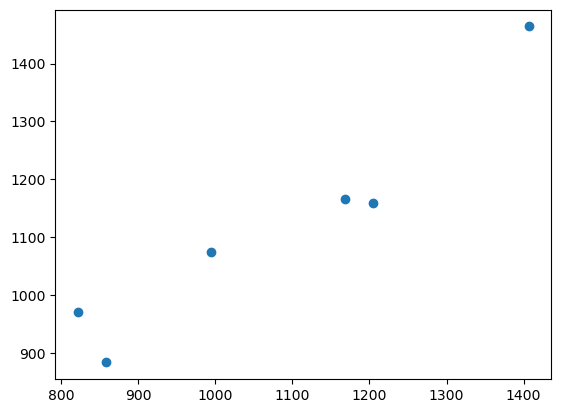

In [45]:
plt.scatter(y_pred,y_test)
# if there ids linear relationship model performed well

In [48]:
residuals = y_pred - y_test
print(residuals)

8      45.227704
16   -149.349481
0     -57.486996
18    -26.291104
11    -80.090077
9       1.169327
Name: index_price, dtype: float64


C:\Users\Pratyush.Thakur\AppData\Local\Temp\ipykernel_22896\3218873624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde = True)


<Axes: xlabel='index_price', ylabel='Density'>

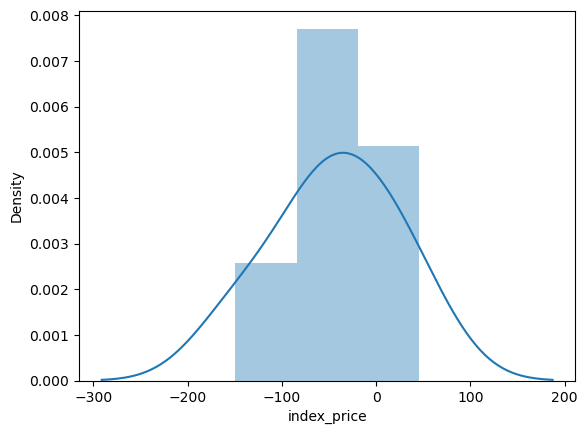

In [50]:
sns.distplot(residuals,kde = True)

In [51]:
# if normal dist of the residuals then good

In [52]:
## scatter plat with predictions and residuals

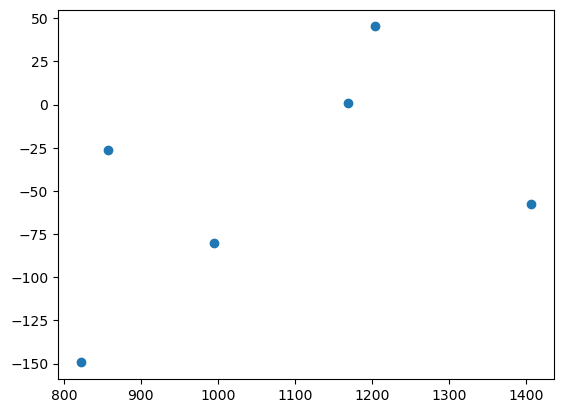

In [55]:
plt.scatter(y_pred,residuals)
#should follow uniform dist that is no patterns should be there

In [57]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [58]:
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 08 Aug 2024   Prob (F-statistic):                       0.754
Time:                        17:43:29   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [60]:
# check that same coeff